In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('new_retail_data.csv')

In [3]:
df.head()

,Unnamed: 0,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [10]:
df=df.drop('Unnamed: 0',axis=1)

In [11]:
print("Shape of the dataset:", df.shape)
df.info()


Shape of the dataset: (302006, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302006 entries, 0 to 302005
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301673 non-null  float64
 1   Customer_ID       301698 non-null  float64
 2   Name              301624 non-null  object 
 3   Email             302006 non-null  object 
 4   Phone             301644 non-null  float64
 5   Address           302006 non-null  object 
 6   City              301758 non-null  object 
 7   State             301725 non-null  object 
 8   Zipcode           301666 non-null  float64
 9   Country           301735 non-null  object 
 10  Age               302006 non-null  float64
 11  Gender            301689 non-null  object 
 12  Income            301716 non-null  object 
 13  Customer_Segment  302006 non-null  object 
 14  Date              301647 non-null  object 
 15  Year              301656 non-null

In [12]:
# Select only numerical columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]
df_numeric.describe()


,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016730e+05,301698.000000,3.016440e+05,301666.000000,302006.00000,301656.000000,301645.000000,301650.000000,301656.000000,302006.000000
mean,5.495836e+06,55006.868783,5.501470e+09,50299.030368,35.47904,2023.165115,5.359701,255.164212,1367.645660,3.162685
std,2.595578e+06,26005.672186,2.596024e+09,28972.877050,15.01774,0.371285,2.868580,141.390122,1129.002947,1.320419
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.00000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32470.000000,3.255061e+09,25425.000000,22.00000,2023.000000,3.000000,132.889531,438.721039,2.000000
50%,5.499735e+06,55013.000000,5.505812e+09,50602.500000,32.00000,2023.000000,5.000000,255.471692,1041.104986,3.000000
75%,7.739524e+06,77511.000000,7.749883e+09,75252.000000,46.00000,2023.000000,8.000000,377.673223,2029.990894,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.00000,2024.000000,10.000000,499.997911,4999.625796,5.000000


Apply Z-score method

In [17]:
z_scores = np.abs(zscore(df_numeric))
pd.DataFrame(z_scores, columns=df_numeric.columns).head()


,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
0,NaN,NaN,NaN,NaN,0.964131,NaN,NaN,NaN,NaN,1.391465
1,NaN,NaN,NaN,NaN,1.097307,NaN,NaN,NaN,NaN,0.634129
2,NaN,NaN,NaN,NaN,0.833746,NaN,NaN,NaN,NaN,0.880544
3,NaN,NaN,NaN,NaN,1.366450,NaN,NaN,NaN,NaN,0.634129
4,NaN,NaN,NaN,NaN,0.897543,NaN,NaN,NaN,NaN,1.637880


In [18]:
df_numeric.isnull().sum()  # Count of nulls in numeric columns


Transaction_ID     333
Customer_ID        308
Phone              362
Zipcode            340
Age                  0
Year               350
Total_Purchases    361
Amount             356
Total_Amount       350
Ratings              0
dtype: int64

In [21]:
# Drop columns with only one unique value
df_clean = df_numeric.loc[:, df_numeric.nunique() > 1]

# Drop rows with NaNs (or use df_clean.fillna())
df_clean = df_clean.dropna()


In [22]:
z_scores = np.abs(zscore(df_clean))
threshold = 3
outliers_zscore = (z_scores > threshold)
df_outliers_zscore = df_clean[outliers_zscore.any(axis=1)]
df_outliers_zscore


,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
150,4613625.0,72950.0,7.785500e+09,42573.0,51.0,2023.0,10.0,488.528716,4885.287161,2.0
159,8093529.0,45413.0,1.816017e+09,24786.0,63.0,2023.0,10.0,485.077362,4850.773617,1.0
484,9627400.0,97549.0,6.532213e+09,10616.0,46.0,2023.0,10.0,475.534661,4755.346608,1.0
916,2425277.0,94261.0,9.906792e+09,96879.0,21.0,2023.0,10.0,490.799916,4907.999165,1.0
1048,7289913.0,61969.0,3.930676e+09,31068.0,21.0,2023.0,10.0,480.828024,4808.280236,3.0
...,...,...,...,...,...,...,...,...,...,...
300852,5398226.0,35252.0,4.838685e+09,77573.0,57.0,2023.0,10.0,484.473873,4844.738726,1.0
301719,7612722.0,91060.0,3.115345e+09,96496.0,57.0,2023.0,10.0,477.383680,4773.836796,2.0
301762,2173333.0,31082.0,1.097862e+09,86920.0,33.0,2023.0,10.0,480.275963,4802.759630,5.0
301900,8626872.0,62191.0,5.251720e+09,30775.0,33.0,2024.0,10.0,488.403357,4884.033570,2.0


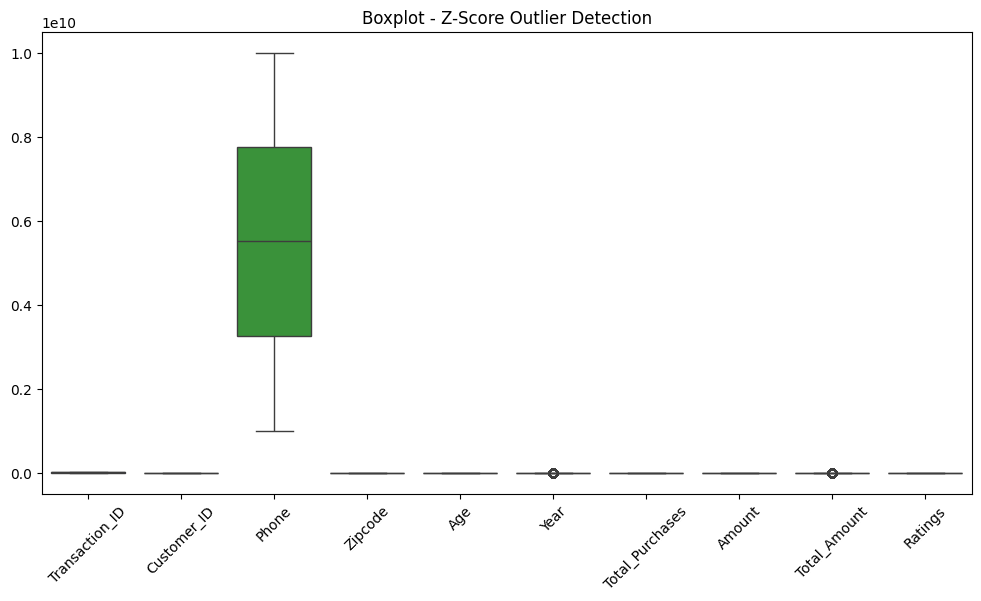

In [23]:
# Example: Boxplot of all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.title("Boxplot - Z-Score Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [15]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Set boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = ((df_numeric < lower_bound) | (df_numeric > upper_bound))
df_outliers_iqr = df_numeric[outliers_iqr.any(axis=1)]
df_outliers_iqr


,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
4,4983775.0,27901.0,9.098268e+09,48704.0,22.0,2024.0,2.0,124.276524,248.553049,1.0
8,4155845.0,80175.0,6.219780e+09,39820.0,46.0,2024.0,8.0,328.839302,2630.714413,1.0
12,2846832.0,31930.0,1.822768e+09,38173.0,56.0,2024.0,10.0,161.879361,1618.793610,1.0
18,7728099.0,78376.0,1.796133e+09,82975.0,49.0,2024.0,1.0,210.137919,210.137919,1.0
22,9476855.0,42410.0,3.745118e+09,83903.0,21.0,2024.0,6.0,34.124266,204.745598,2.0
...,...,...,...,...,...,...,...,...,...,...
301994,9972131.0,NaN,4.260772e+09,42754.0,60.0,2024.0,9.0,413.344509,3720.100576,4.0
301997,5561211.0,35974.0,2.062575e+09,99633.0,61.0,2024.0,7.0,343.066709,2401.466964,1.0
302001,4246475.0,12104.0,7.466354e+09,4567.0,31.0,2024.0,5.0,194.792597,973.962984,1.0
302003,7743242.0,28449.0,9.382530e+09,88038.0,41.0,2024.0,3.0,60.701761,182.105285,2.0


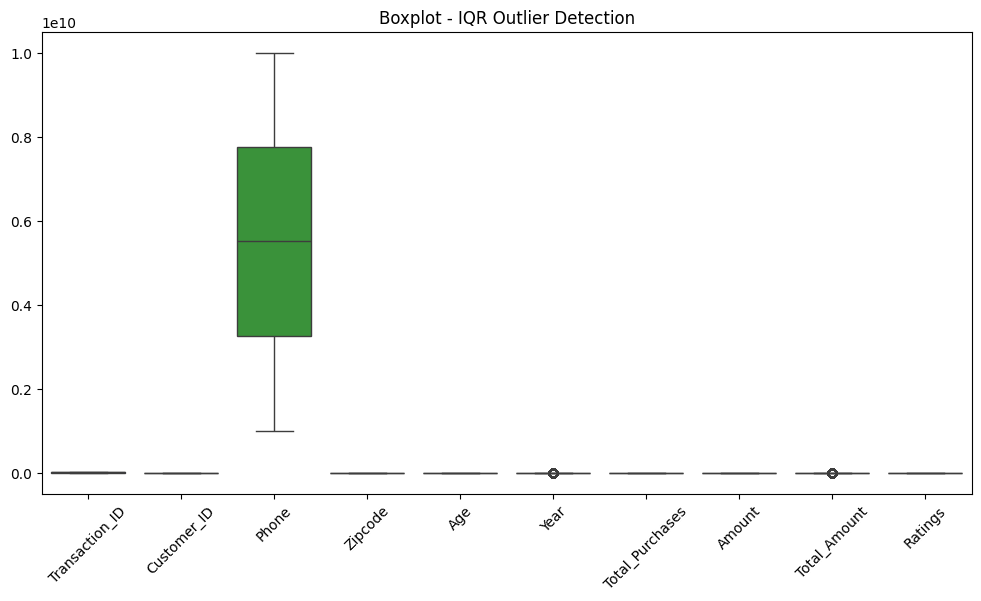

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.title("Boxplot - IQR Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [24]:
df_outliers_zscore.to_excel("zscore_outliers.xlsx", index=False)